Event: IRONMAN 70.3 Langkawi 2018.
<br>Date/Time: 17 November 2018.
<br>Location: Pulau Langkawi, Kedah, Malaysia
<br>Distance: 1.2-mile (1.9 km) swim + 56-mile (90 km) bike ride + 13.1-mile (21.1 km) run.
<br>Source of Data: https://www.sportsplits.com/m3/event?c=1&r=6538&e=1
<br>Data is manually copied and exported into CSV

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
# Read from the CSV
result_all = pd.read_table('E:\DataScience\Jupyter\MultiSports\\IM703Langkawi.csv',sep=',')
result_all.head()

,Position,Name,Time,Category (POS),Gender (POS),Swim,T1,Cycle,T2,Run
0,1,Tim BALLINTINE (#1604),4:14:07,30-34 (1),Male (1),0:25:55,0:02:26,2:23:53,0:01:11,1:20:39
1,2,Paul Lennart SIEMERS (#1409),4:26:55,18-24 (1),Male (2),0:27:02,0:02:24,2:16:40,0:01:40,1:39:06
2,3,Rob POUW (#1505),4:28:48,30-34 (2),Male (3),0:33:03,0:03:01,2:22:08,0:01:43,1:28:51
3,4,Nicolas AUMAGY (#1598),4:32:20,30-34 (3),Male (4),0:29:42,0:02:35,2:23:01,0:01:07,1:35:52
4,5,Christoph G�NTHER (#2020),4:33:32,40-44 (1),Male (5),0:33:41,0:02:25,2:25:40,0:01:11,1:30:33


In [3]:
result_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 10 columns):
Position          911 non-null object
Name              911 non-null object
Time              858 non-null object
Category (POS)    911 non-null object
Gender (POS)      911 non-null object
Swim              911 non-null object
T1                910 non-null object
Cycle             889 non-null object
T2                889 non-null object
Run               871 non-null object
dtypes: object(10)
memory usage: 71.2+ KB


Total record collected is <b>911</b>.

However, timing related columns (Time,Swim,T1,Cycle,T2 and Run) recorded less. This likely due to some triathlete did not completed the race, or the timing was not captured for whatever reason. The earlier usually referred to as DNF.

'<b>Time</b>' recorded least record, only 858 records. Let's check what are the null

In [4]:
result_all[result_all['Time'].isnull()]['Position'].count()

53

In [5]:
result_all[result_all['Time'].isnull()]['Position'].unique()

array(['DNF'], dtype=object)

The 53 records did not finish (DNF) the event.
<br>Let's create new column for the finish status,
<br>so that we'll be able to see how many of them completed the event.

Start by inspecting the Position column

In [6]:
result_all['Position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

We can see that we have non-numeric value in column 'Position' (the actual record type are string).
The columns with DNF, FIN and DQ referred to those did not complete the event.

Let's create new column to record whether triathletes <b>FINISH</b> or did <b>NOT FINISH</b> the event with a function.

In [7]:
def getStatus(x):
    try:
        if (int(x)):
            return "FINISH"     # this covers all the numeric value, which recorded as string
    except ValueError:
        if (x == "FIN"):
            return "FINISH"     # this covers records with FIN
        else:
            return "NOT FINISH"  # This covers records with DQ and DNF

In [8]:
result_all['Status'] = result_all['Position'].apply(getStatus)
result_all.head()

,Position,Name,Time,Category (POS),Gender (POS),Swim,T1,Cycle,T2,Run,Status
0,1,Tim BALLINTINE (#1604),4:14:07,30-34 (1),Male (1),0:25:55,0:02:26,2:23:53,0:01:11,1:20:39,FINISH
1,2,Paul Lennart SIEMERS (#1409),4:26:55,18-24 (1),Male (2),0:27:02,0:02:24,2:16:40,0:01:40,1:39:06,FINISH
2,3,Rob POUW (#1505),4:28:48,30-34 (2),Male (3),0:33:03,0:03:01,2:22:08,0:01:43,1:28:51,FINISH
3,4,Nicolas AUMAGY (#1598),4:32:20,30-34 (3),Male (4),0:29:42,0:02:35,2:23:01,0:01:07,1:35:52,FINISH
4,5,Christoph G�NTHER (#2020),4:33:32,40-44 (1),Male (5),0:33:41,0:02:25,2:25:40,0:01:11,1:30:33,FINISH


<b>'Category (POS)'</b> combine <b>Category</b> and <b>Position</b> by category.
<br><b>'Gender (POS)'</b> combine <b>Gender</b> and <b>Positio</b>n by gender.

Split these into 4 new columns : <b>Cat</b>, <b>CatPos</b>, <b>Gender</b> and <b>GenderPos</b> with functions call.

In [9]:
def splitCategoryPos(x):
    catList = x.split()
    
    catPos = 0
    
    try:
        catPos = catList[1].replace("(","").replace(")","")
    except:
        catPos = 0
    
    return pd.Series([catList[0], int(catPos)])
    
splitCategoryPos(result_all['Category (POS)'][850])

0    45-49
1        0
dtype: object

In [10]:
result_all[['Cat','CatPos']] = result_all['Category (POS)'].apply(splitCategoryPos)

In [11]:
def splitGenderPos(x):
    catList = x.split()
    
    catPos = 0
    
    try:
        catPos = catList[1].replace("(","").replace(")","")
    except:
        catPos = 0
    
    return pd.Series([catList[0], int(catPos)])
    
splitGenderPos(result_all['Gender (POS)'][850])

0    Female
1         0
dtype: object

In [12]:
result_all[['Gender','GenderPos']] = result_all['Gender (POS)'].apply(splitGenderPos)

In [13]:
result_all[200:205]

,Position,Name,Time,Category (POS),Gender (POS),Swim,T1,Cycle,T2,Run,Status,Cat,CatPos,Gender,GenderPos
200,201,Mohd Rody Sazali BIN MOHD ROZDHI (#1545),5:47:32,30-34 (25),Male (176),0:37:52,0:03:31,2:50:10,0:01:54,2:14:03,FINISH,30-34,25,Male,176
201,202,Jason WALKER (#1541),5:47:44,30-34 (26),Male (177),0:33:15,0:02:54,2:43:44,0:01:15,2:26:33,FINISH,30-34,26,Male,177
202,203,Madeleine Jeanne ARGOSINO (#1420),5:47:58,18-24 (2),Female (26),0:31:11,0:04:20,3:00:33,0:02:12,2:09:40,FINISH,18-24,2,Female,26
203,204,Wan Kheat Gavin LOH (#2094),5:48:21,45-49 (28),Male (178),0:41:05,0:08:16,2:48:29,0:06:02,2:04:28,FINISH,45-49,28,Male,178
204,205,Guy HEYWOOD (#2270),5:48:56,50-54 (15),Male (179),0:40:55,0:03:29,2:55:12,0:02:10,2:07:08,FINISH,50-54,15,Male,179


Now let's inspect the datatype for each column

In [14]:
for col in result_all.columns:
    print col,'is',type(result_all[col][1])

Position is <type 'str'>
Name is <type 'str'>
Time is <type 'str'>
Category (POS) is <type 'str'>
Gender (POS) is <type 'str'>
Swim is <type 'str'>
T1 is <type 'str'>
Cycle is <type 'str'>
T2 is <type 'str'>
Run is <type 'str'>
Status is <type 'str'>
Cat is <type 'str'>
CatPos is <type 'numpy.int64'>
Gender is <type 'str'>
GenderPos is <type 'numpy.int64'>


All columns have data recorded as string,
<br>except CatPos and GenderPos we just created.

Convert timing as datetime. The rest look OK to keep as string for this analysis.

In [15]:
result_all['Time'] = pd.to_datetime(result_all['Time'], format="%H:%M:%S").dt.time
result_all['Swim'] = pd.to_datetime(result_all['Swim'], format="%H:%M:%S").dt.time
result_all['T1'] = pd.to_datetime(result_all['T1'], format="%H:%M:%S").dt.time
result_all['Cycle'] = pd.to_datetime(result_all['Cycle'], format="%H:%M:%S").dt.time
result_all['T2'] = pd.to_datetime(result_all['T2'], format="%H:%M:%S").dt.time
result_all['Run'] = pd.to_datetime(result_all['Run'], format="%H:%M:%S").dt.time

for col in result_all.columns:
    print col,'is',type(result_all[col][1])

Position is <type 'str'>
Name is <type 'str'>
Time is <type 'datetime.time'>
Category (POS) is <type 'str'>
Gender (POS) is <type 'str'>
Swim is <type 'datetime.time'>
T1 is <type 'datetime.time'>
Cycle is <type 'datetime.time'>
T2 is <type 'datetime.time'>
Run is <type 'datetime.time'>
Status is <type 'str'>
Cat is <type 'str'>
CatPos is <type 'numpy.int64'>
Gender is <type 'str'>
GenderPos is <type 'numpy.int64'>


In [16]:
result_all.head()

,Position,Name,Time,Category (POS),Gender (POS),Swim,T1,Cycle,T2,Run,Status,Cat,CatPos,Gender,GenderPos
0,1,Tim BALLINTINE (#1604),04:14:07,30-34 (1),Male (1),00:25:55,00:02:26,02:23:53,00:01:11,01:20:39,FINISH,30-34,1,Male,1
1,2,Paul Lennart SIEMERS (#1409),04:26:55,18-24 (1),Male (2),00:27:02,00:02:24,02:16:40,00:01:40,01:39:06,FINISH,18-24,1,Male,2
2,3,Rob POUW (#1505),04:28:48,30-34 (2),Male (3),00:33:03,00:03:01,02:22:08,00:01:43,01:28:51,FINISH,30-34,2,Male,3
3,4,Nicolas AUMAGY (#1598),04:32:20,30-34 (3),Male (4),00:29:42,00:02:35,02:23:01,00:01:07,01:35:52,FINISH,30-34,3,Male,4
4,5,Christoph G�NTHER (#2020),04:33:32,40-44 (1),Male (5),00:33:41,00:02:25,02:25:40,00:01:11,01:30:33,FINISH,40-44,1,Male,5


For ease of analysis, let's use timing in fraction of minute instead of HH:MM:SS
<br>As we noticed, Swimming leg completed in less than 30-min

In [17]:
def timingInMinutes(ts):    
    tsInSec = 0
    
    if type(ts) is float:
        tsInSec = 0
    else:
        tsInSec = (ts.hour*60*60) + (ts.minute*60) + ts.second
    
    return (tsInSec / 60.0)

print result_all['Time'][300],'==',timingInMinutes(result_all['Time'][300]),'minutes'

06:08:56 == 368.933333333 minutes


In [18]:
# Record the timing in fraction of minute into different columns, 
#   so that the original data is preserved.
result_all['Duration'] = result_all['Time'].apply(timingInMinutes)
result_all['Swimming'] = result_all['Swim'].apply(timingInMinutes)
result_all['Tran1'] = result_all['T1'].apply(timingInMinutes)
result_all['Cycling'] = result_all['Cycle'].apply(timingInMinutes)
result_all['Tran2'] = result_all['T2'].apply(timingInMinutes)
result_all['Running'] = result_all['Run'].apply(timingInMinutes)

result_all.head()

,Position,Name,Time,Category (POS),Gender (POS),Swim,T1,Cycle,T2,Run,...,Cat,CatPos,Gender,GenderPos,Duration,Swimming,Tran1,Cycling,Tran2,Running
0,1,Tim BALLINTINE (#1604),04:14:07,30-34 (1),Male (1),00:25:55,00:02:26,02:23:53,00:01:11,01:20:39,...,30-34,1,Male,1,254.116667,25.916667,2.433333,143.883333,1.183333,80.650000
1,2,Paul Lennart SIEMERS (#1409),04:26:55,18-24 (1),Male (2),00:27:02,00:02:24,02:16:40,00:01:40,01:39:06,...,18-24,1,Male,2,266.916667,27.033333,2.400000,136.666667,1.666667,99.100000
2,3,Rob POUW (#1505),04:28:48,30-34 (2),Male (3),00:33:03,00:03:01,02:22:08,00:01:43,01:28:51,...,30-34,2,Male,3,268.800000,33.050000,3.016667,142.133333,1.716667,88.850000
3,4,Nicolas AUMAGY (#1598),04:32:20,30-34 (3),Male (4),00:29:42,00:02:35,02:23:01,00:01:07,01:35:52,...,30-34,3,Male,4,272.333333,29.700000,2.583333,143.016667,1.116667,95.866667
4,5,Christoph G�NTHER (#2020),04:33:32,40-44 (1),Male (5),00:33:41,00:02:25,02:25:40,00:01:11,01:30:33,...,40-44,1,Male,5,273.533333,33.683333,2.416667,145.666667,1.183333,90.550000


We usually speak about overall timing as sub-hour value. Completed in <b>sub-4</b> will mean that the triathletes completed the whole 3 legs and transitions <b>within 4 hours</b>.

Let's create new column <b>'SubHour'</b> with a function call.

In [19]:
import math

def durationSubHour(ts):    
    tsInHour = ts/60
    
    return int(math.ceil(float(tsInHour)))
    
print result_all['Time'][200],'==> sub',durationSubHour(result_all['Duration'][200]),'hours'

05:47:32 ==> sub 6 hours


In [20]:
result_all['SubHour'] = result_all['Duration'].apply(durationSubHour)

# What Can We See From This Result

Let's just see the new columns that we created previously.

In [21]:
result_all[['Cat','Gender','Swim','T1','Cycle','T2','Run','SubHour','Status']].head()

,Cat,Gender,Swim,T1,Cycle,T2,Run,SubHour,Status
0,30-34,Male,00:25:55,00:02:26,02:23:53,00:01:11,01:20:39,5,FINISH
1,18-24,Male,00:27:02,00:02:24,02:16:40,00:01:40,01:39:06,5,FINISH
2,30-34,Male,00:33:03,00:03:01,02:22:08,00:01:43,01:28:51,5,FINISH
3,30-34,Male,00:29:42,00:02:35,02:23:01,00:01:07,01:35:52,5,FINISH
4,40-44,Male,00:33:41,00:02:25,02:25:40,00:01:11,01:30:33,5,FINISH


## Let's look at the completion rate

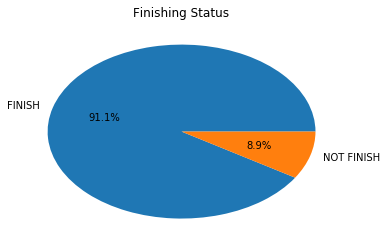

,Status
FINISH,830
NOT FINISH,81


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

result_all.groupby('Status').size().plot(kind='pie',autopct='%1.1f%%')
plt.title("Finishing Status")
plt.ylabel("")
plt.show()

result_all['Status'].value_counts().to_frame()

<b>91%</b> of the triathletes completed the event successfully,
<br>only <b>81</b> triathletes did not managed to completed the event, due to DNF, FIN or DQ.

## Triathletes by gender 

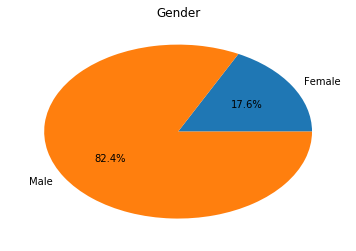

,Gender
Male,751
Female,160


In [23]:
result_all.groupby('Gender').size().plot(kind='pie',autopct='%1.1f%%')
plt.title("Gender")
plt.ylabel("")
plt.show()

result_all['Gender'].value_counts().to_frame()

Most of triathletes in Langkawi IM70.3 was male, with total of 751 people.
<br>Only 751 people (17.6%) are female.

## Triathletes by category

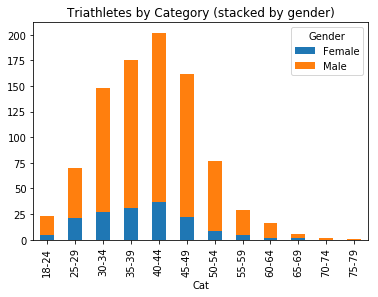

Cat
18-24     23
25-29     70
30-34    148
35-39    175
40-44    202
45-49    162
50-54     77
55-59     29
60-64     16
65-69      6
70-74      2
75-79      1
dtype: int64

In [24]:
plt.figure(figsize=(25,10))
result_all.groupby(['Cat','Gender'])['Name'].size().unstack().plot(kind='bar',stacked=True)
# first unstack() will display Gender side-by-side
#  stacked option display one on top of another

plt.title('Triathletes by Category (stacked by gender)')
plt.show()

result_all.groupby('Cat').size()

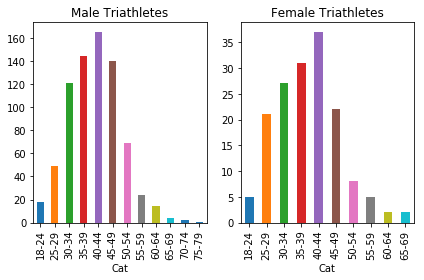

Gender  Cat  
Female  18-24      5
        25-29     21
        30-34     27
        35-39     31
        40-44     37
        45-49     22
        50-54      8
        55-59      5
        60-64      2
        65-69      2
Male    18-24     18
        25-29     49
        30-34    121
        35-39    144
        40-44    165
        45-49    140
        50-54     69
        55-59     24
        60-64     14
        65-69      4
        70-74      2
        75-79      1
dtype: int64

In [25]:
fig = plt.figure()

plt1 = fig.add_subplot(1,2,1)
result_all[result_all['Gender']=='Male'].groupby('Cat').size().plot(kind='bar')
plt1.set_title('Male Triathletes')

plt2 = fig.add_subplot(1,2,2)
result_all[result_all['Gender']=='Female'].groupby('Cat').size().plot(kind='bar')
plt2.set_title('Female Triathletes')

fig.tight_layout()

plt.show()

result_all.groupby(['Gender','Cat']).size()

Majority of the triathletes's age between <b>35 to 50 years old</b>

## Completion status

Let's look at the completion status, as how fast the triathletes completed the IM70.3 in sub-hour.
<br>For this purpose, we will exclude those who did NOT FINISH

Text(0,0.5,u'')

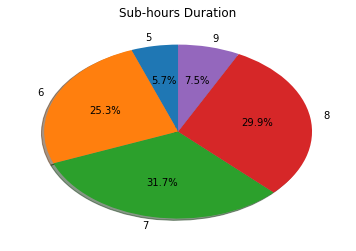

In [26]:
result_all[result_all['Status']=='FINISH'].groupby('SubHour').size().plot(kind='pie',autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Sub-hours Duration")
plt.ylabel("")

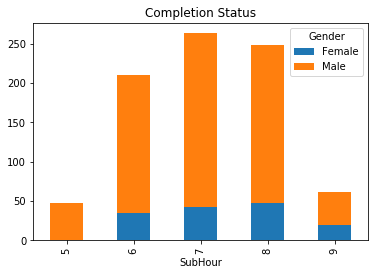

In [27]:
plt.figure(figsize=(25,10))
result_all[result_all['Status']=='FINISH'].groupby(['SubHour','Gender'])['Name'].size().unstack().plot(kind='bar',stacked=True)
# first unstack() will display Gender side-by-side
#  stacked option display one on top of another

plt.title('Completion Status')
plt.show()

The fastest triathletes completed within 5 hours. Earlier above we knew the overall winner completed within <b>04:14:07</b>.
<br>This group only covered <b>5.7%</b> of the triathletes.

From the pie chart above, we can see that more than <b>50% of the triathletes completed within 7 hours</b>. In other word, average triathletes completed within 7 hours, and newbies may target to finish within 7 hours.

Let's just look at the top-10 triathletes.

In [28]:
result_all[result_all['SubHour']==5][['Name','Time','Cat','Gender','Swim','T1','Cycle','T2','Run']].sort_values('Time').head(10)

,Name,Time,Cat,Gender,Swim,T1,Cycle,T2,Run
0,Tim BALLINTINE (#1604),04:14:07,30-34,Male,00:25:55,00:02:26,02:23:53,00:01:11,01:20:39
1,Paul Lennart SIEMERS (#1409),04:26:55,18-24,Male,00:27:02,00:02:24,02:16:40,00:01:40,01:39:06
2,Rob POUW (#1505),04:28:48,30-34,Male,00:33:03,00:03:01,02:22:08,00:01:43,01:28:51
3,Nicolas AUMAGY (#1598),04:32:20,30-34,Male,00:29:42,00:02:35,02:23:01,00:01:07,01:35:52
4,Christoph G�NTHER (#2020),04:33:32,40-44,Male,00:33:41,00:02:25,02:25:40,00:01:11,01:30:33
5,Joel David LIEBI (#1583),04:33:59,30-34,Male,00:31:31,00:02:57,02:19:05,00:01:33,01:38:51
6,Maksim ORLOV (#2171),04:34:19,45-49,Male,00:33:51,00:03:27,02:24:42,00:01:30,01:30:47
7,Cameron STORM (#1710),04:35:47,35-39,Male,00:29:48,00:02:19,02:29:16,00:01:10,01:33:11
8,Leighton MATHESON (#1985),04:36:28,40-44,Male,00:29:44,00:02:57,02:25:25,00:01:38,01:36:41
9,Yamazaki TAKAO (#1663),04:39:19,35-39,Male,00:30:52,00:02:38,02:31:28,00:01:46,01:32:33


Now let's just look at the completion status by Gender and Categories

Text(0.5,1,u'Completion Status By Gender')

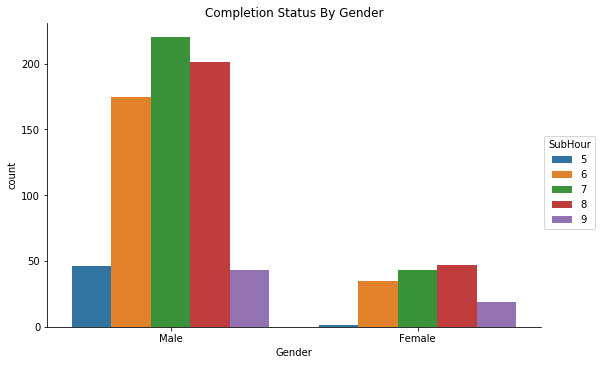

In [29]:
import seaborn as sns

sns.factorplot('Gender',data=result_all[result_all['Status']=='FINISH'],hue='SubHour',kind='count', orient="h",size=5,aspect=1.5)
plt.title("Completion Status By Gender")

Text(0.5,1,u'Completion Status By Category')

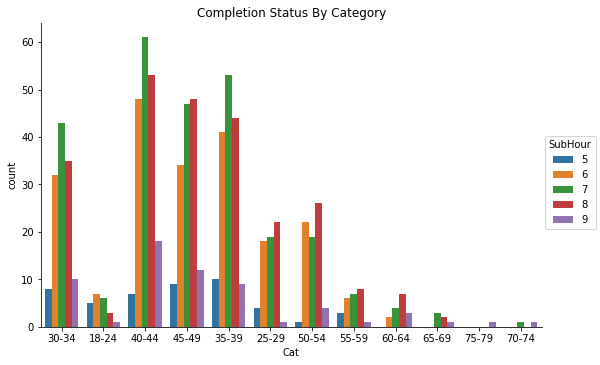

In [30]:
sns.factorplot('Cat',data=result_all[result_all['Status']=='FINISH'],hue='SubHour',kind='count', orient="h",size=5,aspect=1.5)
plt.title("Completion Status By Category")

# How was the timing

To analyze timing, let's only work on those who FINISH the event, and we only interested in selected columns.
<br>Let's create another copy of dataframe.

In [31]:
triDF = result_all[result_all['Status']=='FINISH']\
[['Name','Time','Cat','CatPos','Gender','GenderPos',\
  'Swim','T1','Cycle','T2','Run','Status','Duration',\
  'Swimming','Tran1','Cycling','Tran2','Running']].copy()

triDF.head()

,Name,Time,Cat,CatPos,Gender,GenderPos,Swim,T1,Cycle,T2,Run,Status,Duration,Swimming,Tran1,Cycling,Tran2,Running
0,Tim BALLINTINE (#1604),04:14:07,30-34,1,Male,1,00:25:55,00:02:26,02:23:53,00:01:11,01:20:39,FINISH,254.116667,25.916667,2.433333,143.883333,1.183333,80.650000
1,Paul Lennart SIEMERS (#1409),04:26:55,18-24,1,Male,2,00:27:02,00:02:24,02:16:40,00:01:40,01:39:06,FINISH,266.916667,27.033333,2.400000,136.666667,1.666667,99.100000
2,Rob POUW (#1505),04:28:48,30-34,2,Male,3,00:33:03,00:03:01,02:22:08,00:01:43,01:28:51,FINISH,268.800000,33.050000,3.016667,142.133333,1.716667,88.850000
3,Nicolas AUMAGY (#1598),04:32:20,30-34,3,Male,4,00:29:42,00:02:35,02:23:01,00:01:07,01:35:52,FINISH,272.333333,29.700000,2.583333,143.016667,1.116667,95.866667
4,Christoph G�NTHER (#2020),04:33:32,40-44,1,Male,5,00:33:41,00:02:25,02:25:40,00:01:11,01:30:33,FINISH,273.533333,33.683333,2.416667,145.666667,1.183333,90.550000


## Look at the overall duration

In [32]:
triDF["Duration"].describe()

count    830.000000
mean     394.966727
std       57.821054
min      254.116667
25%      349.329167
50%      397.658333
75%      438.866667
max      509.083333
Name: Duration, dtype: float64

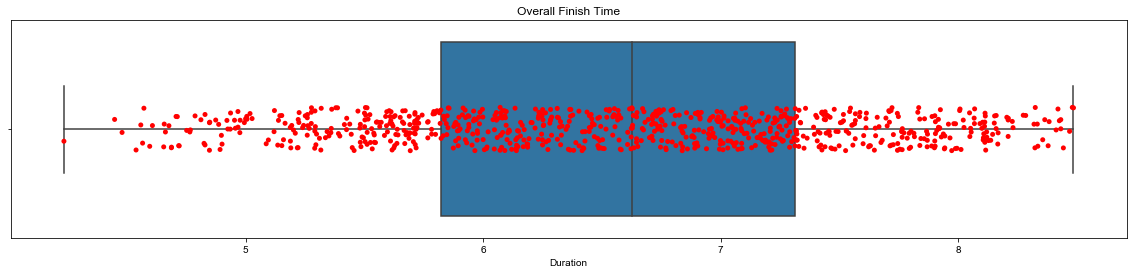

In [33]:
plt.figure(figsize=(20,4))

ax = sns.boxplot(triDF["Duration"]/60)
ax.set_title("Overall Finish Time")
ax.set_xticks(range(4,9,1))
sns.set_style('darkgrid')

sns.stripplot(triDF["Duration"]/60, 
                   jitter=True, 
                   marker='o', 
                   alpha=1,
                   color='red')

plt.show()

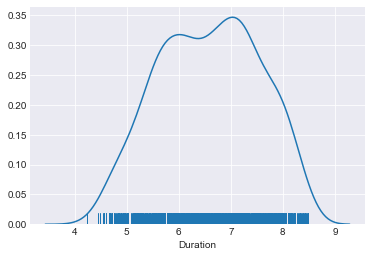

In [34]:
sns.distplot(triDF['Duration']/60, hist=False, rug=True);

In [35]:
meanTimeHour = triDF['Duration'].mean() / 60
firstQTimeHour = triDF['Duration'].quantile(0.25) / 60
medianTimeHour = triDF['Duration'].quantile(0.5) / 60
thirdQTimeHour = triDF['Duration'].quantile(0.75) / 60
minTimeHour = triDF['Duration'].quantile(0) / 60
maxTimeHour = triDF['Duration'].quantile(1) / 60

print 'Minimum = '+str(minTimeHour)+' hours'
print 'Maximum = '+str(maxTimeHour)+' hours'

print 'Mean = '+str(meanTimeHour)+' hours'
print 'Q1 = '+str(firstQTimeHour)+' hours'
print 'median = '+str(medianTimeHour)+' hours'
print 'Q3 = '+str(thirdQTimeHour)+' hours'

Minimum = 4.23527777778 hours
Maximum = 8.48472222222 hours
Mean = 6.58277878179 hours
Q1 = 5.82215277778 hours
median = 6.62763888889 hours
Q3 = 7.31444444444 hours


All triathletes completed the event between <b>4.2 to 8.5 hours</b>, with mean at around <b>6.6 hours</b>.
<br>The overall winner completed within <b>04:14:07</b>. From the boxplot the winner was noticeably faster than the 2nd runner up who finished in <b>04:26:55</b>, around <b>12 minutes</b> apart.

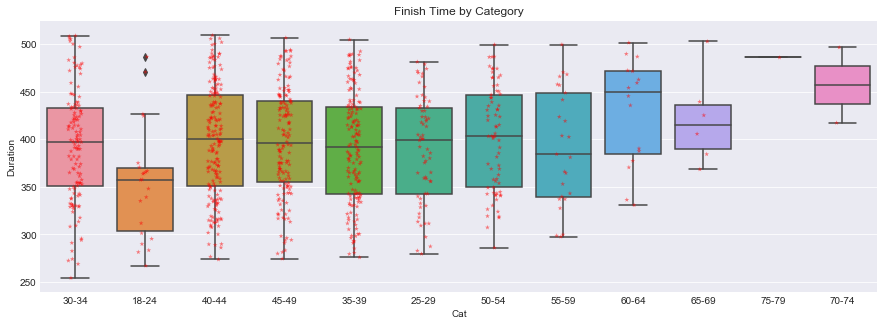

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Cat", y="Duration", data=triDF).set_title('Finish Time by Category')

sns.stripplot(y='Duration', x='Cat', 
                   data=triDF, 
                   jitter=True, 
                   marker='*', 
                   alpha=0.5,
                   color='red')

When compared against age category, we can see younger triathletes (cat 18-24) finished faster than the rest.
<br>Rest of the triathletes were comparable to each other.

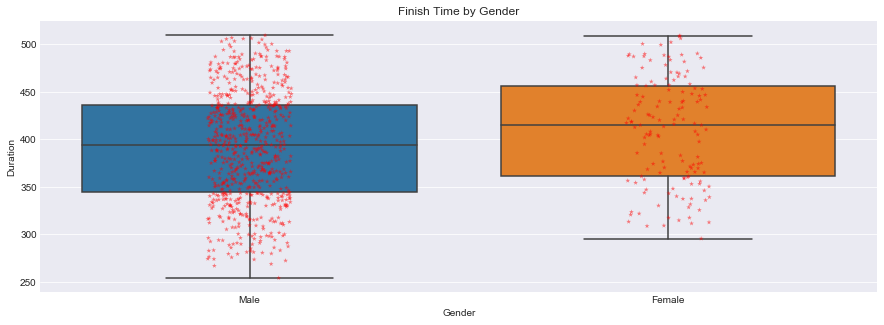

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Gender", y="Duration", data=triDF).set_title('Finish Time by Gender')

sns.stripplot(y='Duration', x='Gender', 
                   data=triDF, 
                   jitter=True, 
                   marker='*', 
                   alpha=0.5,
                   color='red')

## Comparing duration of swim/bike/run 

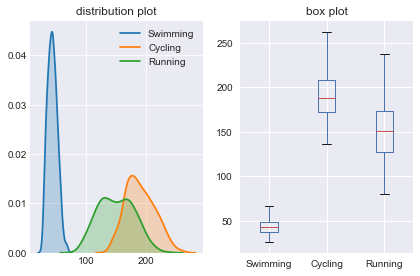

In [38]:
fig = plt.figure()

plt1 = fig.add_subplot(1,2,1)
sns.set(color_codes=True)
sns.kdeplot(triDF["Swimming"],shade=True)
sns.kdeplot(triDF["Cycling"],shade=True)
sns.kdeplot(triDF["Running"],shade=True)
plt1.set_title('distribution plot')

plt2 = fig.add_subplot(1,2,2)
triDF.boxplot(column=['Swimming','Cycling','Running'], figsize=(15,5))
plt2.set_title('box plot')

fig.tight_layout()

plt.show()

In [39]:
def lapPercentage(ts):
    swim,t1,bike,t2,run,total = ts
    
    swimPct = (swim/total)*100
    bikePct = (bike/total)*100
    runPct = (run/total)*100
    t1Pct = (t1/total)*100
    t2Pct = (t2/total)*100
    
    return pd.Series([swimPct, t1Pct, bikePct, t2Pct, runPct])
    
triDF[['SwimPct','T1Pct','BikePct','T2Pct','RunPct']] = \
    triDF[['Swimming','Tran1','Cycling','Tran2','Running','Duration']].apply(lapPercentage,axis=1)

In [40]:
triDF[['SwimPct','T1Pct','BikePct','T2Pct','RunPct']].head()

,SwimPct,T1Pct,BikePct,T2Pct,RunPct
0,10.198728,0.957565,56.620975,0.465665,31.737391
1,10.128005,0.899157,51.201998,0.624415,37.127693
2,12.295387,1.122272,52.876984,0.638641,33.054315
3,10.905753,0.948592,52.515300,0.410037,35.201958
4,12.314160,0.883500,53.253717,0.432610,33.103826


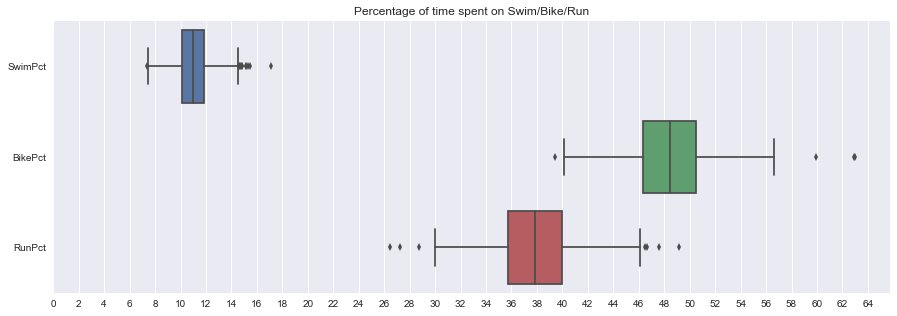

In [41]:
plt.figure(figsize=(15,5))

ax = sns.boxplot(data=triDF[['SwimPct','BikePct','RunPct']], orient='h')
ax.set_xticks(range(0,65,2))

ax.set_title('Percentage of time spent on Swim/Bike/Run')

plt.show()

In [42]:
triDF[['SwimPct','T1Pct','BikePct','T2Pct','RunPct','Swimming','Tran1','Cycling','Tran2','Running']].describe()

,SwimPct,T1Pct,BikePct,T2Pct,RunPct,Swimming,Tran1,Cycling,Tran2,Running
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,11.029193,1.566745,48.503295,0.995024,37.897188,43.486044,6.312450,190.619659,4.016867,150.498695
std,1.405707,0.473102,3.090519,0.426845,3.092512,8.119429,2.434974,24.355553,1.957326,29.558877
min,7.375690,0.582494,39.422976,0.290763,26.432286,25.916667,2.133333,136.666667,0.866667,80.650000
25%,10.095286,1.235041,46.340455,0.684281,35.696721,37.354167,4.400000,171.787500,2.583333,127.145833
50%,11.013912,1.505131,48.469914,0.913125,37.849220,43.141667,6.008333,187.341667,3.725000,150.308333
75%,11.872447,1.817155,50.524415,1.189619,39.965829,49.095833,7.791667,208.029167,5.029167,172.866667
max,17.095067,4.236729,62.968189,3.828402,49.162441,68.833333,18.183333,262.766667,15.483333,237.300000


On average, <b>11%</b> of the time spent on swimming, <b>48.5%</b> on cycling and <b>37.9%</b> on running.
<br>Recommendation from Global Triathlon Network (GITN) is <b>20:50:30</b>, which seem satisfied during this event.

On average, transition-1 was longer than transition-2.
<br>Transition-1 is between swimming and cycling, thus among others they will need to wear shoe, helmet, bibs before start cycling. Notice that we have some one spent >18 minutes in transition-1.
<br>Transition-2 is relatively shorter. Most triathletes straight away running after they park their bike.

## Ranking by overall duration 

The initial dataframe was sorted by overall position. Let's just record this again into new column <b>'OverallRank'</b> as sorted by <b>Duration</b>.

In [43]:
# Rank by overall finishing time
triDF['OverallRank'] = triDF['Duration'].rank(ascending=1).astype(int)
triDF.head()

,Name,Time,Cat,CatPos,Gender,GenderPos,Swim,T1,Cycle,T2,...,Tran1,Cycling,Tran2,Running,SwimPct,T1Pct,BikePct,T2Pct,RunPct,OverallRank
0,Tim BALLINTINE (#1604),04:14:07,30-34,1,Male,1,00:25:55,00:02:26,02:23:53,00:01:11,...,2.433333,143.883333,1.183333,80.650000,10.198728,0.957565,56.620975,0.465665,31.737391,1
1,Paul Lennart SIEMERS (#1409),04:26:55,18-24,1,Male,2,00:27:02,00:02:24,02:16:40,00:01:40,...,2.400000,136.666667,1.666667,99.100000,10.128005,0.899157,51.201998,0.624415,37.127693,2
2,Rob POUW (#1505),04:28:48,30-34,2,Male,3,00:33:03,00:03:01,02:22:08,00:01:43,...,3.016667,142.133333,1.716667,88.850000,12.295387,1.122272,52.876984,0.638641,33.054315,3
3,Nicolas AUMAGY (#1598),04:32:20,30-34,3,Male,4,00:29:42,00:02:35,02:23:01,00:01:07,...,2.583333,143.016667,1.116667,95.866667,10.905753,0.948592,52.515300,0.410037,35.201958,4
4,Christoph G�NTHER (#2020),04:33:32,40-44,1,Male,5,00:33:41,00:02:25,02:25:40,00:01:11,...,2.416667,145.666667,1.183333,90.550000,12.314160,0.883500,53.253717,0.432610,33.103826,5


In [44]:
# Get the record at pctg of the OverallRank
pctg = 0.25

index = int(math.floor(pctg * triDF['Time'].count()))
triDF[triDF['OverallRank']==index][['Time','Swim','T1','Cycle','T2','Run','OverallRank']]

,Time,Swim,T1,Cycle,T2,Run,OverallRank
205,05:49:08,00:39:49,00:06:11,02:49:36,00:02:50,02:10:39,207


## Swimming Leg

In [45]:
# Determine the ranking based on faster swimmer
triDF['SwimRank'] = triDF['Swimming'].rank(ascending=1).astype(int)

In [46]:
# List down top-10 swimmer
triDF[['SwimRank','OverallRank','Time','Cat','Gender','Swim','Swimming','SwimPct']].sort_values('SwimRank').head(10)

,SwimRank,OverallRank,Time,Cat,Gender,Swim,Swimming,SwimPct
0,1,1,04:14:07,30-34,Male,00:25:55,25.916667,10.198728
58,2,59,05:09:08,25-29,Female,00:26:35,26.583333,8.599310
1,3,2,04:26:55,18-24,Male,00:27:02,27.033333,10.128005
29,4,30,04:50:57,30-34,Male,00:27:45,27.750000,9.537721
52,5,53,05:05:45,35-39,Male,00:27:57,27.950000,9.141455
41,6,42,04:58:04,35-39,Male,00:27:58,27.966667,9.382688
63,7,64,05:11:19,25-29,Male,00:28:28,28.466667,9.143958
48,8,49,05:00:20,35-39,Male,00:28:32,28.533333,9.500555
344,9,346,06:19:34,35-39,Male,00:28:58,28.966667,7.631510
296,10,298,06:08:27,30-34,Male,00:29:00,29.000000,7.870810


In [47]:
triDF[['Swimming','SwimPct']].describe()

,Swimming,SwimPct
count,830.000000,830.000000
mean,43.486044,11.029193
std,8.119429,1.405707
min,25.916667,7.375690
25%,37.354167,10.095286
50%,43.141667,11.013912
75%,49.095833,11.872447
max,68.833333,17.095067


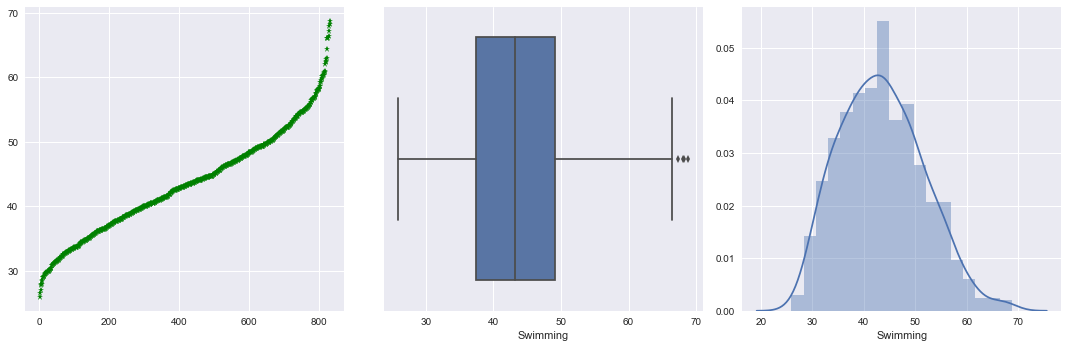

In [48]:
fig = plt.figure(figsize=(15,5))

plt1 = fig.add_subplot(1,3,1)
plt1.plot(triDF['SwimRank'], triDF['Swimming'], '*', color='green')
#plt1.set_title("Swimming Duration (min)")

plt2 = fig.add_subplot(1,3,2)
sns.boxplot(triDF['Swimming']);

fig.tight_layout()

plt2 = fig.add_subplot(1,3,3)
sns.distplot(triDF['Swimming']);
fig.tight_layout()

plt.show()

In [49]:
triDF[triDF['Swimming']>60]['Name'].count()

23

In this event, triathletes spent the 19.km swimming-leg between <b>7.38% to 17.1%</b> of their overall timing.
<br>The fastest swimmer completed this leg within <b>00:25:55</b>, and the slowest drag to more than an hour. This covered around 23 swimmers.
<br>50% of the triathletes completed the swimming-leg within 43.1 min.

Comparing the top-10 swimmer to the overall position, it seem that they fit in lower position in overall ranking, except the the overall winner and 1st runner up. Let's see more on the correlation.

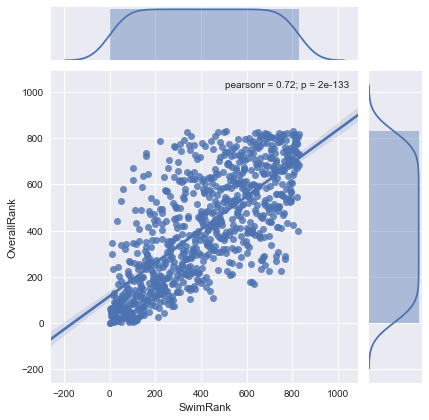

In [50]:
# Look at the correlation of ranking in swimming and the overall ranking
sns.jointplot('SwimRank','OverallRank',data=triDF,kind='reg')

In [51]:
# List down the top-10 swimmer
triDF[['SwimRank','OverallRank','Swim','Swimming','SwimPct']].sort_values('SwimRank').head(10)

,SwimRank,OverallRank,Swim,Swimming,SwimPct
0,1,1,00:25:55,25.916667,10.198728
58,2,59,00:26:35,26.583333,8.599310
1,3,2,00:27:02,27.033333,10.128005
29,4,30,00:27:45,27.750000,9.537721
52,5,53,00:27:57,27.950000,9.141455
41,6,42,00:27:58,27.966667,9.382688
63,7,64,00:28:28,28.466667,9.143958
48,8,49,00:28:32,28.533333,9.500555
344,9,346,00:28:58,28.966667,7.631510
296,10,298,00:29:00,29.000000,7.870810


The correlation is around <b>0.71</b>, showing a weak relationship between SwimRank to the OveralRank.
<br>Faster swimmers, doesn't really fit in the better overall standing.

How about effort spent on swimming (analyzed by percentage of time spent against overal timing)

In [52]:
# List down the top-10 swimmer who spent less time during the swimming leg
triDF[['SwimRank','OverallRank','Swim','Swimming','SwimPct']].sort_values('SwimPct').head(10)

,SwimRank,OverallRank,Swim,Swimming,SwimPct
828,57,581,00:31:52,31.866667,7.375690
696,102,670,00:33:40,33.666667,7.470967
628,49,529,00:31:31,31.516667,7.472536
712,32,441,00:30:21,30.350000,7.526037
843,158,736,00:35:48,35.800000,7.608118
344,9,346,00:28:58,28.966667,7.631510
785,104,621,00:33:41,33.683333,7.677113
610,160,724,00:35:53,35.883333,7.696157
789,221,787,00:37:44,37.733333,7.754221
296,10,298,00:29:00,29.000000,7.870810


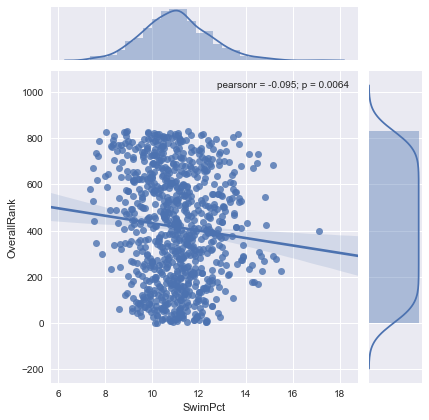

In [53]:
# Look at the correlation of ranking in swimming and the overall ranking
sns.jointplot('SwimPct','OverallRank',data=triDF,kind='reg')

In [54]:
# determine how they sit in overall position based on effort spent on swimming
for pct in range(7, 18):
    maxOverallRank = triDF[ (triDF['SwimPct']>pct) & (triDF['SwimPct']<=(pct+1))]['OverallRank'].max()
    minOverallRank = triDF[ (triDF['SwimPct']>pct) & (triDF['SwimPct']<=(pct+1))]['OverallRank'].min()
    cnt = triDF[ (triDF['SwimPct']>pct) & (triDF['SwimPct']<=(pct+1))]['OverallRank'].count()
    print str(pct) + '% : min=' + str(minOverallRank) + ' --> max=' + str(maxOverallRank) + ' --> count=' + str(cnt)

7% : min=298 --> max=787 --> count=10
8% : min=59 --> max=830 --> count=47
9% : min=30 --> max=825 --> count=128
10% : min=1 --> max=823 --> count=227
11% : min=6 --> max=829 --> count=226
12% : min=3 --> max=817 --> count=126
13% : min=108 --> max=816 --> count=45
14% : min=167 --> max=732 --> count=16
15% : min=225 --> max=682 --> count=4
16% : min=nan --> max=nan --> count=0
17% : min=400 --> max=400 --> count=1


In [55]:
triDF[triDF['OverallRank']<11][['SwimPct','SwimRank','OverallRank']].describe()

,SwimPct,SwimRank,OverallRank
count,10.000000,10.000000,10.00000
mean,11.229604,44.500000,5.50000
std,0.845758,40.404208,3.02765
min,10.128005,1.000000,1.00000
25%,10.767468,19.250000,3.25000
50%,10.978266,28.500000,5.50000
75%,12.097323,74.500000,7.75000
max,12.339753,109.000000,10.00000


There's negative (and weak) correlation between effert spent on swimming against overall result.
<br>From the above listing, we can see that those in higher overall position spent between <b>10% to 13% of the overall time</b> in swimming-leg.

Thus, early assumption can be made that <u><b>pushing hard on swimming-leg will not result in better overall result</b></u>.

In [56]:
triDF[['SwimRank','Swim','SwimPct','OverallRank']].corr()

,SwimRank,SwimPct,OverallRank
SwimRank,1.000000,0.599131,0.719836
SwimPct,0.599131,1.000000,-0.094556
OverallRank,0.719836,-0.094556,1.000000


## Bike Leg

In [57]:
triDF['BikeRank'] = triDF['Cycling'].rank(ascending=1).astype(int)

In [58]:
triDF[['BikeRank','OverallRank','Time','Cat','Gender','Cycle','Cycling','BikePct']].sort_values('BikeRank').head(10)

,BikeRank,OverallRank,Time,Cat,Gender,Cycle,Cycling,BikePct
1,1,2,04:26:55,18-24,Male,02:16:40,136.666667,51.201998
5,2,6,04:33:59,30-34,Male,02:19:05,139.083333,50.763428
2,3,3,04:28:48,30-34,Male,02:22:08,142.133333,52.876984
3,4,4,04:32:20,30-34,Male,02:23:01,143.016667,52.515300
43,5,44,04:58:33,35-39,Male,02:23:22,143.366667,48.020990
12,6,13,04:40:38,35-39,Male,02:23:42,143.700000,51.205606
11,7,12,04:39:45,45-49,Male,02:23:47,143.783333,51.397081
0,8,1,04:14:07,30-34,Male,02:23:53,143.883333,56.620975
10,9,11,04:39:27,25-29,Male,02:23:54,143.900000,51.494006
19,10,20,04:45:07,35-39,Male,02:24:39,144.650000,50.733618


In [59]:
triDF[['BikeRank','OverallRank','Time','Cat','Gender','Cycle','Cycling','BikePct']].sort_values('BikeRank').tail()

,BikeRank,OverallRank,Time,Cat,Gender,Cycle,Cycling,BikePct
830,826,769,08:00:20,30-34,Male,04:14:27,254.450000,52.973629
784,827,768,07:59:39,30-34,Male,04:17:13,257.216667,53.625908
575,828,488,06:53:23,30-34,Male,04:20:18,260.300000,62.968189
776,829,799,08:09:05,35-39,Male,04:22:01,262.016667,53.573011
785,830,621,07:18:45,45-49,Male,04:22:46,262.766667,59.889839


In [60]:
triDF[['BikeRank','Cycling','BikePct']].describe()

,BikeRank,Cycling,BikePct
count,830.000000,830.000000,830.000000
mean,415.442169,190.619659,48.503295
std,239.751180,24.355553,3.090519
min,1.000000,136.666667,39.422976
25%,208.250000,171.787500,46.340455
50%,415.000000,187.341667,48.469914
75%,622.750000,208.029167,50.524415
max,830.000000,262.766667,62.968189


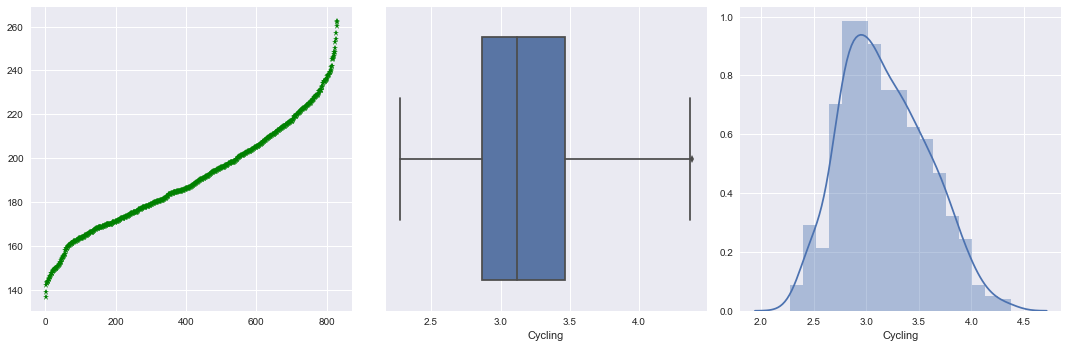

In [61]:
fig = plt.figure(figsize=(15,5))

plt1 = fig.add_subplot(1,3,1)
plt1.plot(triDF['BikeRank'], triDF['Cycling'], '*', color='green')
#plt1.set_title("Swimming Duration (min)")

plt2 = fig.add_subplot(1,3,2)
sns.boxplot(triDF['Cycling']/60);
fig.tight_layout()

plt2 = fig.add_subplot(1,3,3)
sns.distplot(triDF['Cycling']/60);
fig.tight_layout()

plt.show()

In this event, triathletes spent the 90km cycling-leg between <b>02:16:40 to 04:22:46</b> hours. This is between <b>39.4% to 63%</b> of the total overall timing.

let's see how ranking in the bike-leg correlate to the overall position.

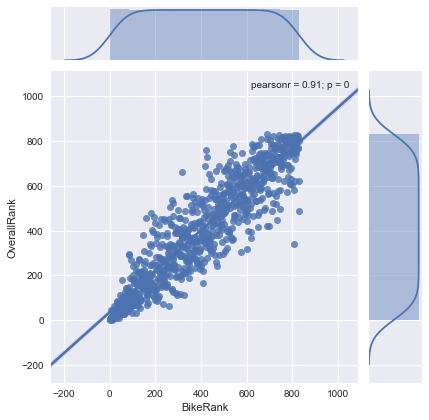

In [62]:
sns.jointplot('BikeRank','OverallRank',data=triDF,kind='reg')

In [63]:
# List down the top-10 cyclist
triDF[['BikeRank','OverallRank','Cycling','BikePct','Cycle']].sort_values('OverallRank').head(10)

,BikeRank,OverallRank,Cycling,BikePct,Cycle
0,8,1,143.883333,56.620975,02:23:53
1,1,2,136.666667,51.201998,02:16:40
2,3,3,142.133333,52.876984,02:22:08
3,4,4,143.016667,52.515300,02:23:01
4,13,5,145.666667,53.253717,02:25:40
5,2,6,139.083333,50.763428,02:19:05
6,11,7,144.700000,52.749256,02:24:42
7,26,8,149.266667,54.124615,02:29:16
8,12,9,145.416667,52.598264,02:25:25
9,39,10,151.466667,54.227579,02:31:28


In [64]:
# How much top-triathletes spent on cycling ?
# determine how they sit in overall position based on effort spent on swimming
for pct in range(39, 64):
    maxOverallRank = triDF[ (triDF['BikePct']>pct) & (triDF['BikePct']<=(pct+1))]['OverallRank'].max()
    minOverallRank = triDF[ (triDF['BikePct']>pct) & (triDF['BikePct']<=(pct+1))]['OverallRank'].min()
    cnt = triDF[ (triDF['BikePct']>pct) & (triDF['BikePct']<=(pct+1))]['OverallRank'].count()
    print str(pct) + '% : min=' + str(minOverallRank) + ' --> max=' + str(maxOverallRank) + ' --> count=' + str(cnt)

39% : min=760 --> max=760 --> count=1
40% : min=664 --> max=729 --> count=2
41% : min=456 --> max=779 --> count=6
42% : min=435 --> max=830 --> count=16
43% : min=382 --> max=823 --> count=32
44% : min=268 --> max=827 --> count=43
45% : min=179 --> max=825 --> count=78
46% : min=114 --> max=819 --> count=88
47% : min=61 --> max=829 --> count=99
48% : min=44 --> max=828 --> count=109
49% : min=36 --> max=821 --> count=105
50% : min=6 --> max=824 --> count=73
51% : min=2 --> max=763 --> count=75
52% : min=3 --> max=769 --> count=43
53% : min=5 --> max=799 --> count=29
54% : min=8 --> max=604 --> count=20
55% : min=70 --> max=624 --> count=4
56% : min=1 --> max=65 --> count=4
57% : min=nan --> max=nan --> count=0
58% : min=nan --> max=nan --> count=0
59% : min=621 --> max=621 --> count=1
60% : min=nan --> max=nan --> count=0
61% : min=nan --> max=nan --> count=0
62% : min=341 --> max=488 --> count=2
63% : min=nan --> max=nan --> count=0


In [65]:
triDF[triDF['OverallRank']<11][['BikePct','BikeRank','OverallRank']].describe()

,BikePct,BikeRank,OverallRank
count,10.000000,10.000000,10.00000
mean,53.093212,11.900000,5.50000
std,1.652273,12.059574,3.02765
min,50.763428,1.000000,1.00000
25%,52.536041,3.250000,3.25000
50%,52.813120,9.500000,5.50000
75%,53.906890,12.750000,7.75000
max,56.620975,39.000000,10.00000


Generally we can see that ranking in cycling-leg highly correlated to the overall ranking (corr=0.91).
<br>The top-10 triathletes spent between <b>50.7% to 56.6%</b> of the overall timing.

## Run Leg

In [66]:
triDF['RunRank'] = triDF['Running'].rank(ascending=1).astype(int)

In [67]:
triDF[['RunRank','OverallRank','Time','Cat','Gender','Run','Running','RunPct']].sort_values('RunRank').head(10)

,RunRank,OverallRank,Time,Cat,Gender,Run,Running,RunPct
0,1,1,04:14:07,30-34,Male,01:20:39,80.650000,31.737391
2,2,3,04:28:48,30-34,Male,01:28:51,88.850000,33.054315
28,3,28,04:50:52,45-49,Male,01:30:09,90.150000,30.993582
4,4,5,04:33:32,40-44,Male,01:30:33,90.550000,33.103826
6,5,7,04:34:19,45-49,Male,01:30:47,90.783333,33.094356
32,6,33,04:53:33,45-49,Male,01:32:02,92.033333,31.351842
9,7,10,04:39:19,35-39,Male,01:32:33,92.550000,33.134435
7,8,8,04:35:47,35-39,Male,01:33:11,93.183333,33.788602
29,9,30,04:50:57,30-34,Male,01:33:36,93.600000,32.170476
38,10,39,04:56:12,35-39,Male,01:34:18,94.300000,31.836597


In [68]:
triDF[['RunRank','OverallRank','Time','Cat','Gender','Run','Running','RunPct']].sort_values('RunRank').tail()

,RunRank,OverallRank,Time,Cat,Gender,Run,Running,RunPct
452,826,809,08:13:38,40-44,Male,03:39:23,219.383333,44.442569
474,827,827,08:26:32,45-49,Male,03:42:08,222.133333,43.853646
852,828,729,07:48:03,55-59,Male,03:42:46,222.766667,47.594630
805,829,760,07:56:35,40-44,Male,03:54:18,234.300000,49.162441
723,830,830,08:29:05,40-44,Male,03:57:18,237.300000,46.613194


In [69]:
triDF[['RunRank','Running','RunPct']].describe()

,RunRank,Running,RunPct
count,830.000000,830.000000,830.000000
mean,415.439759,150.498695,37.897188
std,239.736402,29.558877,3.092512
min,1.000000,80.650000,26.432286
25%,208.250000,127.145833,35.696721
50%,415.500000,150.308333,37.849220
75%,622.000000,172.866667,39.965829
max,830.000000,237.300000,49.162441


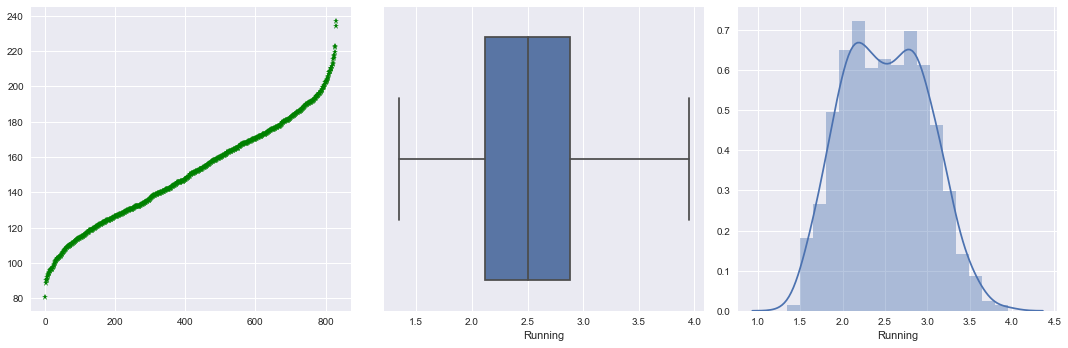

In [70]:
fig = plt.figure(figsize=(15,5))

plt1 = fig.add_subplot(1,3,1)
plt1.plot(triDF['RunRank'], triDF['Running'], '*', color='green')
#plt1.set_title("Swimming Duration (min)")

plt2 = fig.add_subplot(1,3,2)
sns.boxplot(triDF['Running']/60);
fig.tight_layout()

plt2 = fig.add_subplot(1,3,3)
sns.distplot(triDF['Running']/60);
fig.tight_layout()

plt.show()

In this event, triathletes ran the half-marathon (21.1km) between <b>01:20:39 to 03:57:18</b> hours. This is between <b>26.4% to 41.1%</b> of the total overall timing.

let's see how ranking in the run-leg correlate to the overall position.

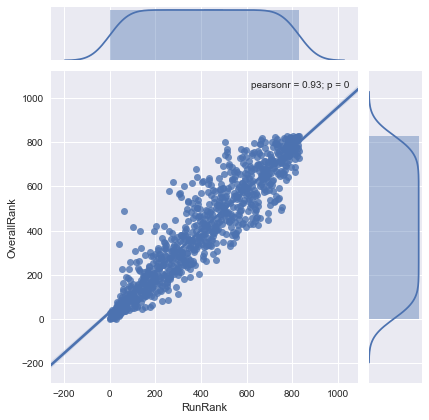

In [71]:
sns.jointplot('RunRank','OverallRank',data=triDF,kind='reg')

In [72]:
triDF[triDF['OverallRank']<11][['RunPct','RunRank','OverallRank']].describe()

,RunPct,RunRank,OverallRank
count,10.000000,10.000000,10.00000
mean,34.129248,11.100000,5.50000
std,1.658499,9.338689,3.02765
min,31.737391,1.000000,1.00000
25%,33.096723,4.250000,3.25000
50%,33.461519,7.500000,5.50000
75%,35.144235,17.750000,7.75000
max,37.127693,26.000000,10.00000


Generally we can see that ranking in running-leg highly correlated to the overall ranking (corr=0.93).
<br>The top-10 triathletes spent between <b>31.7% to 37.1%</b> of the overall timing.

## Top 25%  

In [73]:
# Let's see how top-25% triathletes spent on swim/bike/run

idx = (0.25 * 830) + 1

triDF[triDF['OverallRank']<=idx][['OverallRank','SwimRank','SwimPct','BikeRank','BikePct','RunRank','RunPct']].describe()

,OverallRank,SwimRank,SwimPct,BikeRank,BikePct,RunRank,RunPct
count,208.000000,208.000000,208.000000,208.00000,208.000000,208.000000,208.000000
mean,104.480769,158.798077,11.011658,122.37500,51.029057,121.423077,35.970956
std,60.187707,126.069483,1.068080,85.12749,2.045217,81.216618,2.142876
min,1.000000,1.000000,8.599310,1.00000,45.407642,1.000000,30.993582
25%,52.750000,60.750000,10.197176,52.75000,49.490952,54.750000,34.707784
50%,104.500000,131.500000,11.059865,108.50000,51.032757,111.500000,35.851405
75%,156.250000,230.500000,11.736882,177.50000,52.444419,178.250000,37.253679
max,208.000000,632.000000,14.508382,410.00000,56.620975,392.000000,42.144363


In [74]:
triDF[triDF['OverallRank']<=idx][['Swim','T1','Cycle','T2','Run','Time']].min()

Swim     00:25:55
T1       00:02:08
Cycle    02:16:40
T2       00:00:52
Run      01:20:39
Time     04:14:07
dtype: object

In [75]:
triDF[triDF['OverallRank']<=idx][['Swim','T1','Cycle','T2','Run','Time']].max()

Swim     00:49:20
T1       00:08:16
Cycle    03:06:45
T2       00:11:46
Run      02:26:33
Time     05:49:19
dtype: object

The top-25% triathletes made of the fastest <b>208 triathletes</b>.

The top-25% triathletes spent on average <b>11.01% swimming</b>, <b>51.01% cycling</b> and <b>35.97% running</b>, with total duration between <b>04:14:07 - 05:49:19</b>.
- Swimming : <b>00:25:55 - 00:49:20</b>
- Cycling : <b>02:16:40 - 03:06:45</b>
- Running : <b>01:20:39 - 02:26:33</b>

From earlier, we said that swimming has weak correlation to the overall timing, compared to cycling and running. From the above, we can see that this group of triathletes ranked less than <b>57 in cycling</b> and less than <b>43 in running</b>. However, the slowest swimmer was at position <b>632 in swimming</b>.

The overall timing (Time) is inclusive of transition time T1 for swim-to-bike and T2 for bike-to-run. This 25% fastest spent between 2min to 8min in T1. However, we noticed longer transition in T2 up to 12min.

## Transition Time 

In [76]:
# First let's see the how they spent on these transition time
triDF[['Tran1','Tran2']].describe()

,Tran1,Tran2
count,830.000000,830.000000
mean,6.312450,4.016867
std,2.434974,1.957326
min,2.133333,0.866667
25%,4.400000,2.583333
50%,6.008333,3.725000
75%,7.791667,5.029167
max,18.183333,15.483333


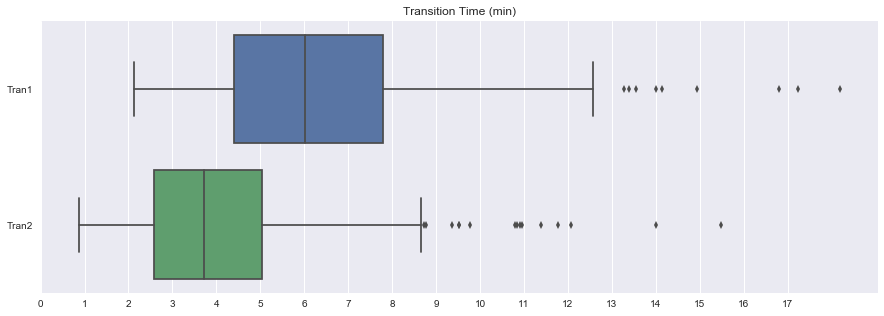

In [77]:
plt.figure(figsize=(15,5))

ax = sns.boxplot(data=triDF[['Tran1','Tran2']], orient='h')
ax.set_xticks(range(0,18,1))

ax.set_title('Transition Time (min)')

plt.show()

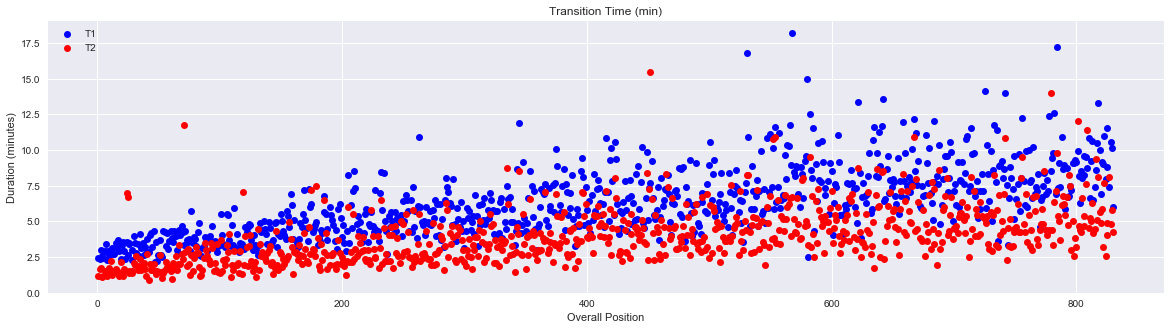

In [78]:
plt.figure(figsize=(20,5))

plt.plot(triDF['OverallRank'],triDF['Tran1'], 'o', color='blue', label='T1')
plt.plot(triDF['OverallRank'],triDF['Tran2'], 'o', color='red', label='T2')
plt.legend(loc='upper left')

plt.title('Transition Time (min)')
plt.xlabel("Overall Position")
plt.ylabel("Duration (minutes)")

plt.show()

In [79]:
# Outliers in T1; how's their swimming
triDF[triDF['Tran1']>13][['OverallRank','Swim','T1']].sort_values('OverallRank')

,OverallRank,Swim,T1
470,531,00:45:08,00:16:48
519,568,00:49:22,00:18:11
658,580,00:55:46,00:14:57
461,622,00:41:32,00:13:24
465,642,00:59:38,00:13:33
619,725,00:46:40,00:14:09
455,742,00:47:34,00:14:01
457,784,00:54:03,00:17:14
475,818,00:51:43,00:13:17


In [80]:
# Outliers in T2; how's their ride
triDF[triDF['Tran2']>9][['OverallRank','Cycle','T2']].sort_values('OverallRank')

,OverallRank,Cycle,T2
70,71,02:32:45,00:11:46
449,452,03:08:58,00:15:29
456,552,03:18:08,00:10:48
454,554,03:11:56,00:10:55
458,582,03:32:31,00:09:32
453,667,03:33:52,00:10:57
455,742,03:46:54,00:10:51
459,756,04:02:15,00:09:31
450,779,03:19:18,00:14:00
457,784,03:30:55,00:09:47


In [81]:
# Transition time for the top-25%
triDF[triDF['OverallRank']<=idx][['Tran1','Tran2']].describe()

,Tran1,Tran2
count,208.000000,208.000000
mean,3.934295,2.427083
std,1.070049,1.321744
min,2.133333,0.866667
25%,3.191667,1.583333
50%,3.700000,2.083333
75%,4.504167,2.804167
max,8.266667,11.766667


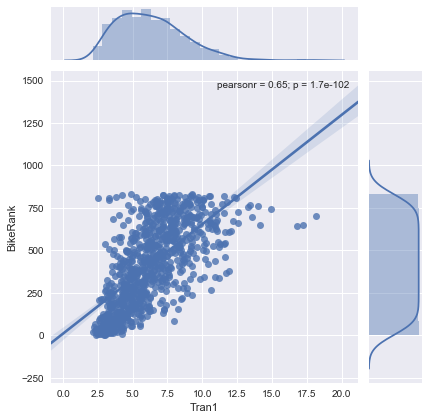

In [82]:
sns.jointplot('Tran1','BikeRank',data=triDF,kind='reg')

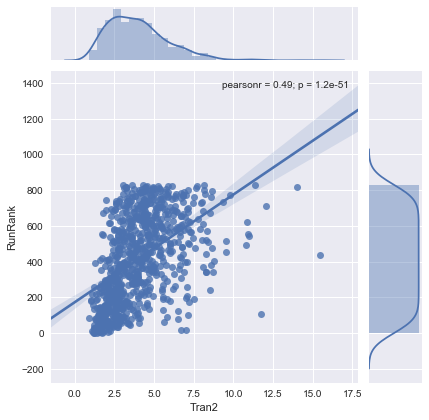

In [83]:
sns.jointplot('Tran2','RunRank',data=triDF,kind='reg')

In [84]:
triDF[['SwimRank','Tran1','BikeRank','Tran2','RunRank','OverallRank']].corr()

,SwimRank,Tran1,BikeRank,Tran2,RunRank,OverallRank
SwimRank,1.000000,0.583817,0.605380,0.435598,0.602267,0.719836
Tran1,0.583817,1.000000,0.654137,0.686750,0.577938,0.699817
BikeRank,0.605380,0.654137,1.000000,0.518921,0.730049,0.914302
Tran2,0.435598,0.686750,0.518921,1.000000,0.491349,0.577064
RunRank,0.602267,0.577938,0.730049,0.491349,1.000000,0.926796
OverallRank,0.719836,0.699817,0.914302,0.577064,0.926796,1.000000


Swim-to-bike transition (T1) was relatively longer than bike-to-run transition (T2). From the describe() above, the mean value are <b>6.3</b> and <b>4.0</b> respectively. The top-25% spent shorter during transition time.

Technically, triathletes will need to do more thing during T1 like wearing sock, shoe and bibs. Proper preparation prior to the race help, as they tried to make sure everything in order. Most triathletes also wear tri-suit, which mean they will use the same suit for all three legs. These made up the outliers in the box plot above.

The jointplots show that the correlations are weak between transition times and event after it. Similarly, there's only smaller correlation between the transition times and the overall position.

<b><u>Conclusion :</u></b> Although triathlon require to be faster in all 3 legs and the transition times, triathletes should concentrate more on the bike and run. Treat swimming as warming-up leg, while utilize the transition times as fast possible, to keep the momentum in the rest of the races.

On average, 11% of the time spent on swimming, 48.5% on cycling and 37.9% on running. 